# Load Pandas Dataframe 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 

In [2]:
BATCH_SIZE = 2
SHUFFLE_BUFFER_SIZE = 500

## Download the CSV file containing the heart disease dataset 

In [3]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

### Read the csv file using pandas 

In [4]:
df = pd.read_csv(csv_file)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

We will build model to predict the label contained in the `target` column 

In [7]:
target = df.pop('target')

### A Dataframe as an array

Take the numeric features from the dataset for now 

In [8]:
numeric_feature_names = ['age', 'thalach', 'trestbps', 'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [9]:
tf.convert_to_tensor(numeric_features)

2024-12-30 15:34:22.745049: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-30 15:34:22.745078: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-30 15:34:22.745081: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-30 15:34:22.745097: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-30 15:34:22.745106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

*NOTE* In general, if an object can be converted to a tensor with tf.convert_to_tensor it can be passed anywhere you can pass a tf.Tensor.

### Using Model.fit

A Dataframe, when interpreted as a single tensor, can be used directly as an argument to the `Model.fit` method. Now, We will train a model on the numeric features of the dataset. 

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(numeric_features))

In [11]:
# Call the layer on the first three rows of the dataframe 
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93384   ,  0.03480783,  0.74578166, -0.26008663,  1.0680453 ],
       [ 1.3782114 , -1.7806157 ,  1.5923294 ,  0.75738776,  0.38022864],
       [ 1.3782114 , -0.87290394, -0.6651312 , -0.33687717,  1.3259765 ]],
      dtype=float32)>

Use the Normalization layer as the first layer of our Model

In [12]:
def get_model(): 
    model = tf.keras.Sequential([
        normalizer, 
        tf.keras.layers.Dense(10, activation='relu'), 
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1) 
    ])

    model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [13]:
model = get_model()

In [14]:
model.fit(numeric_features, target, epochs=20, batch_size=BATCH_SIZE)

Epoch 1/20


2024-12-30 15:34:23.243075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5395 - loss: 0.9618
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7238 - loss: 0.5995
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7894 - loss: 0.4718
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7873 - loss: 0.4331
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7701 - loss: 0.4814
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7562 - loss: 0.4713
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7740 - loss: 0.4405
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7803 - loss: 0.4324
Epoch 9/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7728 - loss: 0.4503
Epoch 10/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7705 - loss: 0.4522
Epoch 11/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7794 - loss: 0.4352 
Epoch 12/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 

### With tf.data
If you want to apply `tf.data` transformations to a dataframe of a uniform `dtype`, the `Dataset.from_tensor_slices` method will create a dataset that iterates over the rows of the Dataframe. Each row is initially a vector of values. To Train a model, you need (inputs, labels) pairs, so pass (features, labels) and Dataset.from_tensor_slices will return the needed pairs of slices

In [15]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

In [16]:
 numeric_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(5,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [17]:
for row in numeric_dataset.take(5): 
    print(row[0])

tf.Tensor([ 63.  150.  145.  233.    2.3], shape=(5,), dtype=float64)
tf.Tensor([ 67.  108.  160.  286.    1.5], shape=(5,), dtype=float64)
tf.Tensor([ 67.  129.  120.  229.    2.6], shape=(5,), dtype=float64)
tf.Tensor([ 37.  187.  130.  250.    3.5], shape=(5,), dtype=float64)
tf.Tensor([ 41.  172.  130.  204.    1.4], shape=(5,), dtype=float64)


2024-12-30 15:34:54.381405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_model()
model.fit(numeric_batches, epochs=10)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6692 - loss: 0.6975
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7364 - loss: 0.6052 
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7998 - loss: 0.5027
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7702 - loss: 0.4636
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7803 - loss: 0.4238
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8215 - loss: 0.3873
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7673 - loss: 0.4324
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7722 - loss: 0.4503
Epoch 9/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7906 - loss: 0.4064 
Epoch 10/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8033 - loss: 0.4134


## Dataframe as a Dictionary 

A Dataframe is similar to dictionary of arrays, so typically all you need to do is cast the dataframe to a python dict. Many important TF APIs support nested-dictionaries of arrays as inputs. 

`tf.data` input pipelines handle this quite well. All tf.data operations handle dictionaries and tuples automatically. So, to make a dataset of dictionary-examples from a DataFrame, just cast it to a dict before slicing it with `Dataset.from_tensor_slices`

In [19]:
numeric_features_dict = {key: value.to_numpy()[:, tf.newaxis] for key, value in dict(numeric_features).items()}
target_array = target.to_numpy()[:, tf.newaxis]

In [20]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((numeric_features_dict, target_array))

In [21]:
len(numeric_features_dict)

5

In [22]:
for row in numeric_dict_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([63])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([150])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([145])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([233])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.3])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([108])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([160])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([286])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.5])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([129])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([120])

2024-12-30 15:35:09.145914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
class MyModel(tf.keras.Model):
  def __init__(self):
    # Create all the internal layers in init.
    super().__init__()

    self.normalizer = tf.keras.layers.Normalization(axis=-1)

    self.seq = tf.keras.Sequential([
      self.normalizer,
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

    self.concat = tf.keras.layers.Concatenate(axis=1)

  def _stack(self, input_dict):
    values = []
    for key, value in sorted(input_dict.items()):
      values.append(value)

    return self.concat(values)

  def adapt(self, inputs):
    # Stack the inputs and `adapt` the normalization layer.
    inputs = self._stack(inputs)
    self.normalizer.adapt(inputs)

  def call(self, inputs):
    # Stack the inputs
    inputs = self._stack(inputs)
    # Run them through all the layers.
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(numeric_features_dict)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

This model can accept either a dictionary of columns or a dataset of dictionary-elements for training

In [24]:
model.fit(numeric_features_dict, target_array, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7448 - loss: 0.6646
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7501 - loss: 0.5439
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7270 - loss: 0.5130
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7270 - loss: 0.5051
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7965 - loss: 0.4266


In [25]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7481 - loss: 0.4653
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7686 - loss: 0.4576
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8404 - loss: 0.3639
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7399 - loss: 0.4522
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8024 - loss: 0.3907


In [26]:
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [27]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.4868486 ],
       [0.12534665],
       [0.49856097]], dtype=float32)

## Full Example 

### Build a Pre-Processing Head 

In this dataset some of the "integer" features in the raw data are actually Categorical indices. These indices are not really ordered numeric values. Because these are unordered they are inappropriate to feed directly to the model; the model would interpret them as being ordered. To use these inputs you'll need to encode them, either as one-hot vectors or embedding vectors. The same applies to string-categorical features.

Binary features on the other hand do not generally need to be encoded or normalized.

Start by seperating the features by their group type 

In [28]:
binary_feature_names = ['sex', 'fbs', 'exang']

In [29]:
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca'] 

The next step is to build a preprocessing model that will apply the appropriate preprocessing to each input and concatenate the results. 
We start by creating one Input layer for each column of the dataframe.

In [30]:
inputs = {}
for name, col in df.items(): 
    if type(col[0]) == str: 
        dtype = tf.string
    elif type(name in categorical_feature_names or name in binary_feature_names): 
        dtype = tf.int64
    else: 
        dtype = tf.float32

    inputs[name] = tf.keras.layers.Input(shape=(1,), name=name, dtype=dtype)

In [31]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=slope>,
 'ca': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>,
 'thal': <KerasTensor shape=(None, 1), dtype=str

Each Input will undergo some transformation using layers and TF ops.

### Binary Outputs 

In [32]:
preprocessed = []

Since the binary inputs don't need any preprocessing, just add the vector axis, cast them to float32 and add them to the list of preprocessed inputs:

In [33]:

for name in binary_feature_names: 
    inp = inputs[name]
    preprocessed.append(inp)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>]

### Numeric Outputs 

In [34]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

In [35]:
# Stacks the Numeric Features and runs them through the normalization layer 
numeric_inputs = []

for name in numeric_feature_names: 
    numeric_inputs.append(inputs[name])
    
numeric_inputs = tf.keras.layers.Concatenate(axis=-1)(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)
preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_17>]

In [36]:
# This is how the above Code Block works :

# Let's say we have these numeric features
# inputs = {
#     'age': tensor_shape[batch_size, 1],
#     'income': tensor_shape[batch_size, 1],
#     'years_exp': tensor_shape[batch_size, 1]
# }

# After appending, numeric_inputs is a list:
# [age_tensor, income_tensor, years_exp_tensor]

# After concatenation:
# Single tensor with shape [batch_size, 3]

### Categorical Features 

To use categorical features you'll first need to encode them into either binary vectors or embeddings. Since these features only contain a small number of categories, convert the inputs directly to one-hot vectors using the `output_mode='one_hot'` option, supported by both the `tf.keras.layers.StringLookup` and `tf.keras.layers.IntegerLookup` layers.

Here is an example of how these layers work

In [37]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=int64, numpy=
array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])>

In [38]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')
lookup([-1,4,1,8])

<tf.Tensor: shape=(4, 5), dtype=int64, numpy=
array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])>

To determine the vocabulary for each input, create a layer to convert that vocabulary to a one-hot vector:

In [39]:
for name in categorical_feature_names: 
    vocab = sorted(set(df[name]))
    print(f'name: {name}')
    print(f'vocab: {vocab}\n')

    if type(vocab[0]) is str: 
        lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
    else: 
        lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

    x = inputs[name]
    x = lookup(x)
    preprocessed.append(x)



name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



In [40]:
preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_17>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_18>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_19>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_20>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_21>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_22>]

Concatenate all the preprocessed features along the depth axis, so each dictionary-example is converted into a single vector. The vector contains categorical features, numeric features, and categorical one-hot features:

In [41]:
preprocessed_result = tf.keras.layers.Concatenate(axis=1)(preprocessed) 
preprocessed_result

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_23>

Now create a model out of that calculation so it can be reused

In [42]:
preprocessor  = tf.keras.Model(inputs, preprocessed_result)

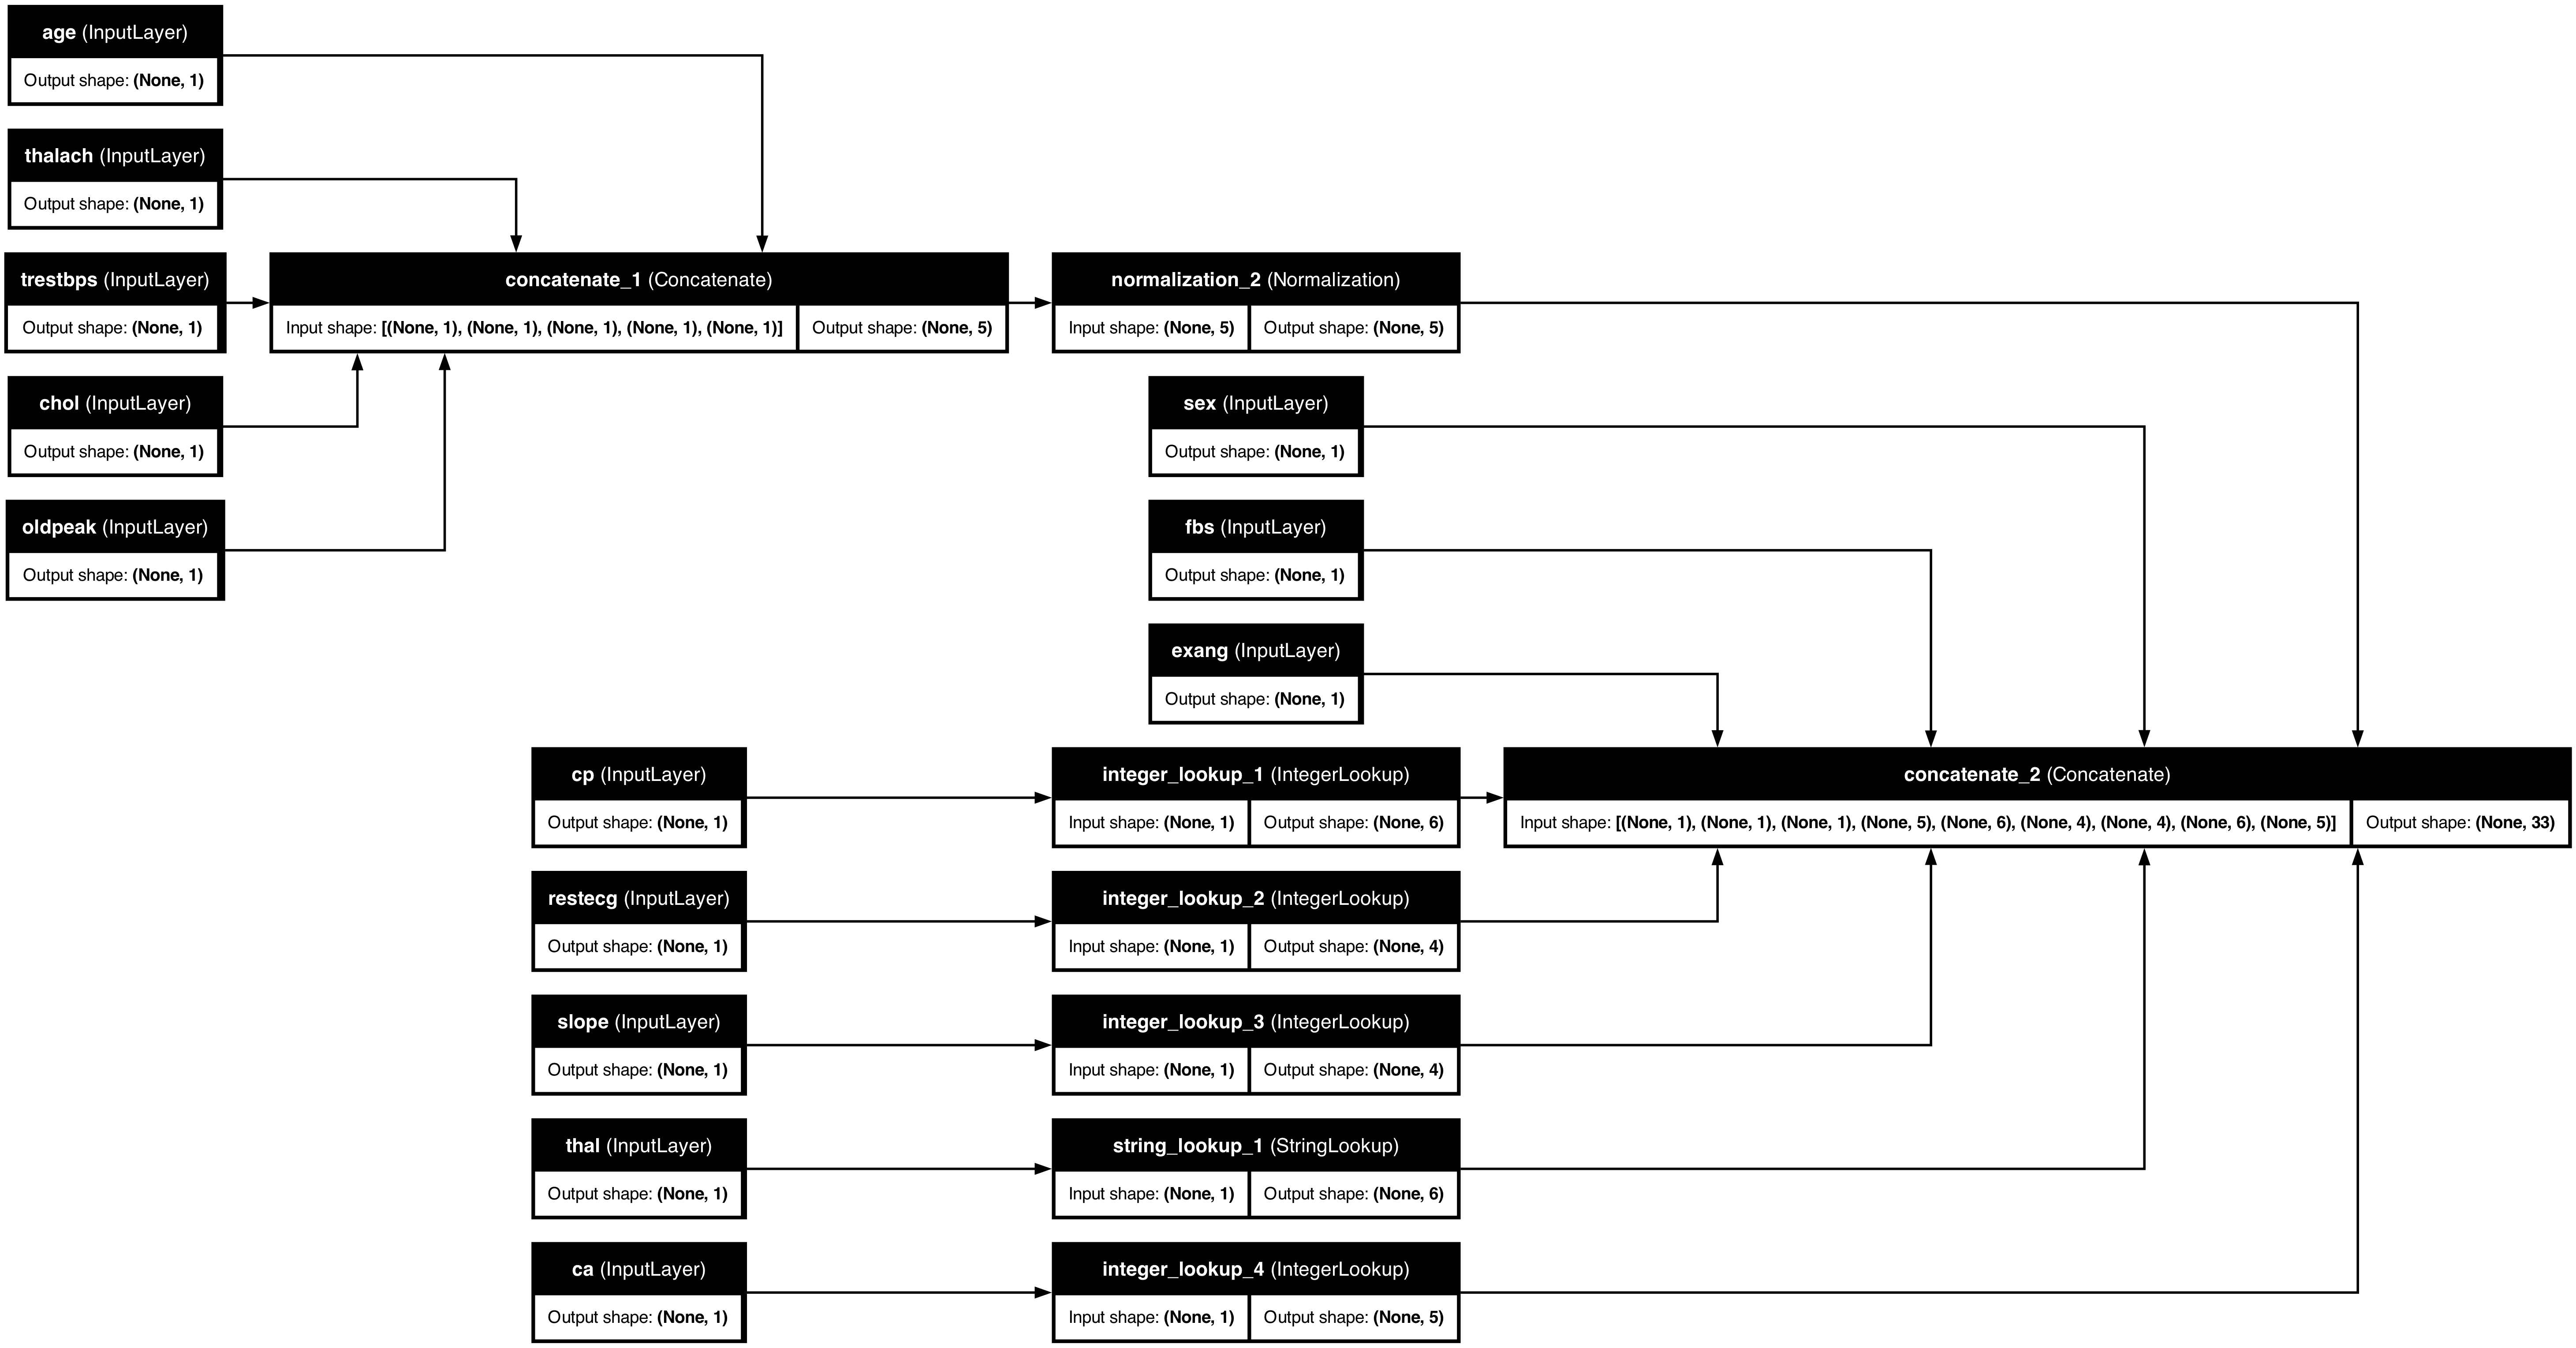

In [43]:
tf.keras.utils.plot_model(preprocessor, rankdir='LR', show_shapes=True, show_layer_names=True)

To test the preprocessor,Slice the first example from the DataFrame. Then convert it to a dictionary and pass the dictionary to the preprocessor. The result is a single vector containing the binary features, normalized numeric features and the one-hot categorical features, in that order

In [44]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[  1.       ,   1.       ,   0.       ,   0.93384  ,  -1.8534899,
        123.75735  ,   3.6224306,  -7.32464  ,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   1.       ,   0.       ,   0.       ,
          0.       ,   1.       ,   0.       ,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   1.       ,
          0.       ,   0.       ,   0.       ]], dtype=float32)>

## Create and Train a Model

In [45]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [46]:
x = preprocessor(inputs)
x

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_24>

In [47]:
result = body(x)
result

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_29>

In [48]:
model = tf.keras.Model(inputs, result)

In [49]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

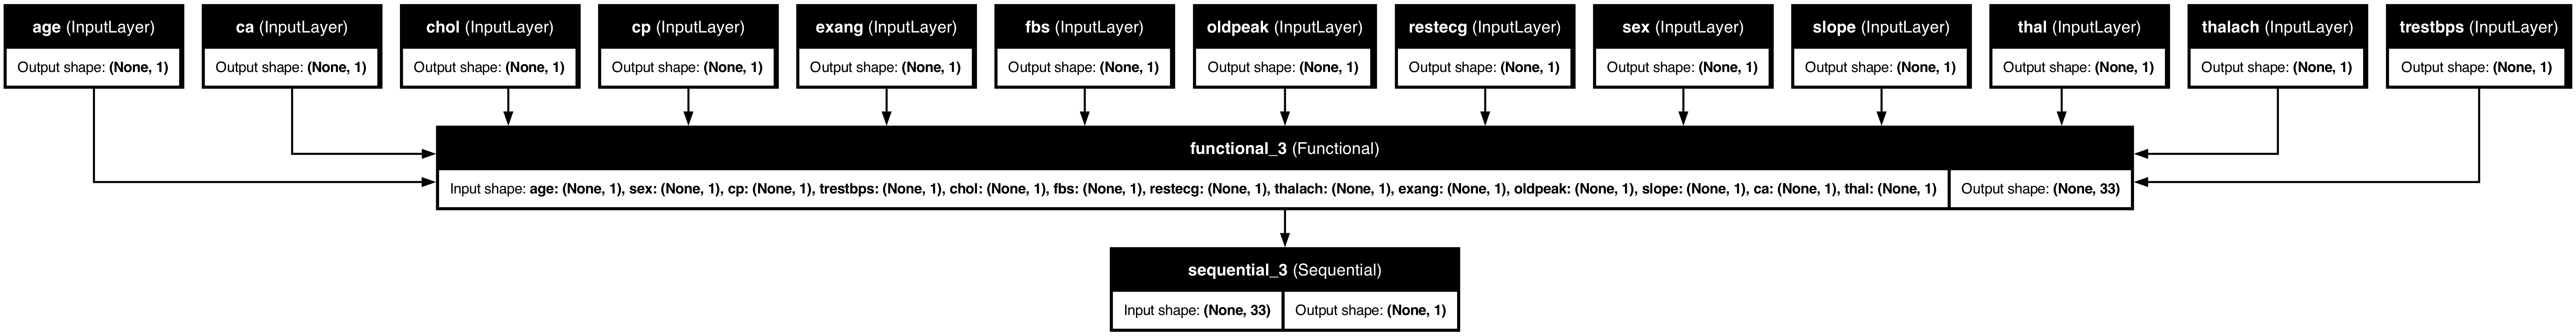

In [50]:
tf.keras.utils.plot_model(model, show_shapes=True,  show_layer_names=True)

In [56]:
ds = tf.data.Dataset.from_tensor_slices((
    dict(df),
    target
))

ds = ds.batch(BATCH_SIZE)

In [58]:
history = model.fit(ds, epochs=10)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7713 - loss: 0.5137
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7924 - loss: 0.4670
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8116 - loss: 0.4359
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8175 - loss: 0.4162
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8318 - loss: 0.4038
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8210 - loss: 0.3957
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8251 - loss: 0.3903
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8251 - loss: 0.3862
Epoch 9/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8266 - loss: 0.3832
Epoch 10/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8283 - loss: 0.3807
